<a href="https://colab.research.google.com/github/gverafei/artificial-networks-technologies/blob/main/tarea5/tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 5**
Nov 2025



## Instrucciones

Considerando los casos de estudios descritos en clase en el archivo Definicion del problema.pdf, elabore genere dos modelos usando Redes Neuronales con Tensorflow.

+ **Carga y exploración de datos**
    + Cargar cada conjunto de datos desde su enlace correspondiente. 
    + Mostrar las primeras filas, los tipos de datos y estadísticas descriptivas.
    + Identificar las variables de entrada y salida.

+ **Preprocesamiento**
    + Convertir variables categóricas en numéricas (si aplica).
    + Dividir los datos en entrenamiento y prueba (70%–30% o similar).

+ **Diseño del modelo (RNA con TensorFlow/Keras)**
    + Construir una red neuronal para cada caso:
        + Caso 1 (Regresión): capa de salida con activación lineal.
        + Caso 2 (Clasificación): capa de salida con activación sigmoide.
    + Justificar:
        + Número de capas ocultas y neuronas por capa.
        + Funciones de activación elegidas.
        + Tasa de aprendizaje (learning rate) utilizada.
    + Entrenar usando el optimizador Adam (u otro justificado) y función de pérdida adecuada:
        + mse para regresión
        + binary_crossentropy para clasificación

+ **Entrenamiento y evaluación**
    + Definir número de épocas de entrenamiento
    + Evaluar el modelo con:
        + Regresión: MAE, RMSE
        + Clasificación: Accuracy, Precision, Recall, F1
    + Graficar:
        + Curvas de entrenamiento y validación (loss, val_loss)
        + Resultados de predicción (y_real vs y_predicho o matriz de confusión)
        + Distribución de errores o residuales

+ **Comparación de resultados**
    + Crear una tabla comparando el desempeño del modelo con y sin preprocesamiento.
    + Discutir el impacto del escalado en la convergencia y precisión del modelo.



## A. Configure virtual environment

Estas línea solo se ejecutan la primera vez. Solicitará crear un virtual environment. En un notebook en línea como Colab, pedirá selecciona el kernel de la esquina superior derecha.

In [1]:
!python3 -m venv .venv

In [2]:
!source .venv/bin/activate # Linux/Mac
# !.\venv\Scripts\activate # Windows

In [3]:
!pip install --upgrade pip --quiet

## B. Instala dependencias necesarias

In [4]:
!pip install numpy --quiet

In [5]:
!pip install matplotlib --quiet

In [6]:
!pip install tensorflow --quiet

In [7]:
!pip install scikit-learn --quiet

In [8]:
!pip install --upgrade certifi --quiet

## C. Configura el ambiente de pandas

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
pd.set_option('display.width', 800)

print("Versiones -> pandas:", pd.__version__)

Versiones -> pandas: 2.3.2


---
## Caso 1: Modelo de Predicción de Generación de Energía (Regresión)

**Descripción del problema**

Una planta de energía de ciclo combinado (CCPP) genera electricidad mediante la combinación de turbinas de gas (GT) y turbinas de vapor (ST) conectadas a generadores de vapor de recuperación de calor. Este sistema aprovecha los gases de escape de la turbina de gas para producir vapor que alimenta la turbina de vapor, incrementando así la eficiencia global del proceso.

El rendimiento de generación eléctrica de la planta está condicionado por diversas variables ambientales, tales como la temperatura ambiente, la presión atmosférica, la humedad relativa y el vacío de escape. Comprender la relación entre estas variables y la producción eléctrica es fundamental para optimizar el desempeño de la planta y anticipar ajustes operativos.

**Objetivo del modelo**

Desarrollar un modelo de regresión supervisada, basado en redes neuronales artificiales (RNA), capaz de predecir la potencia eléctrica neta generada (EP) por hora en función de las condiciones ambientales de operación.

### 1. Carga y exploración de datos

### 1.1 Cargamos el archivo desde la ubicación remota como lo solicita la tarea.

In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/sdominguez/Datasets/refs/heads/master/PlantaEnergiaCicloCombinado/power_plant.csv", header=0, sep=',')

print("\nVista previa del archivo:")
print(df)


Vista previa del archivo:
         AT      V       AP     RH      PE
0     23.25  71.29  1008.05  71.36  442.21
1     13.87  42.99  1007.45  81.52  471.12
2     16.91  43.96  1013.32  79.87  465.86
3     10.09  37.14  1012.99  72.59  473.66
4     12.72  40.60  1013.45  86.16  471.23
...     ...    ...      ...    ...     ...
9563  28.27  66.56  1007.36  55.99  433.52
9564  21.89  58.62  1016.15  74.59  450.05
9565   3.20  41.31   997.67  98.84  489.86
9566  17.79  43.52  1020.65  68.29  458.57
9567  14.70  48.60  1006.91  85.65  460.63

[9568 rows x 5 columns]


### 1.2 Mostrar las primeras filas, los tipos de datos y estadísticas descriptivas.

In [11]:
# Imprime las primeras 10 filas
print(df.head(10))

# Información del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Valores únicos por columna
print("\nValores únicos por columna:")
for c in df.columns:
    print(f"- {c}: {df[c].nunique()} únicos")

# Estadísticas descriptivas
print("\nEstadísticas numéricas:")
print(df.describe())


      AT      V       AP     RH      PE
0  23.25  71.29  1008.05  71.36  442.21
1  13.87  42.99  1007.45  81.52  471.12
2  16.91  43.96  1013.32  79.87  465.86
3  10.09  37.14  1012.99  72.59  473.66
4  12.72  40.60  1013.45  86.16  471.23
5  17.77  52.90  1020.11  81.51  457.98
6  24.14  63.21  1012.28  89.08  440.74
7  29.05  75.60  1017.63  51.16  439.14
8  17.44  45.01  1013.65  75.13  456.08
9  11.17  44.77  1018.20  79.60  470.85

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None

Valores únicos por columna:
- AT: 2773 únicos
- V: 634 únicos
- AP: 2517 únicos
- RH: 4546 únicos
- PE: 4836 únicos

Es

### 1.3 Identificar variables de entrada (X) y salida (y)

Según el enunciado del problema, las entradas son AT (temperatura), AP (presión), RH (humedad) y V (vacío), y la salida/target es EP (energía neta generada).

In [12]:
# === 1.3 Identificación de variables ===
# Entradas (features) y salida (target) según la definición del problema.
feature_cols = ['AT', 'V', 'AP', 'RH']   # Temperatura, Presión, Humedad, Vacío
target_col   = 'PE'                      # Energía eléctrica neta generada

# Verificación de que las columnas existan en el DataFrame
missing = [c for c in feature_cols + [target_col] if c not in df.columns]
assert len(missing) == 0, f"Faltan columnas en el DataFrame: {missing}"

# Separar X e y
X = df[feature_cols].copy()
y = df[target_col].copy()

print("Columnas de entrada (X):", list(X.columns))
print("Columna de salida (y):", target_col)
print("Shape X:", X.shape, "- Shape y:", y.shape)

# Comprobación rápida de valores faltantes
print("\nValores faltantes por columna en X:")
print(X.isna().sum())
print("\nValores faltantes en y:", y.isna().sum())


Columnas de entrada (X): ['AT', 'V', 'AP', 'RH']
Columna de salida (y): PE
Shape X: (9568, 4) - Shape y: (9568,)

Valores faltantes por columna en X:
AT    0
V     0
AP    0
RH    0
dtype: int64

Valores faltantes en y: 0


### 2. Preprocesamiento

Para este dataset **no hay variables categóricas**, así que el foco será:

+ dividir en **train/test (70/30)**, y
+ preparar dos versiones de los datos para poder comparar con y sin escalado (esto lo pide la tarea en la comparación final).

### 2.1 Codificar variables categóricas

No hay variables categóricas.

### 2.2 Dividir los datos en entrenamiento y prueba (70%–30% o similar).

In [13]:
# === 2.1 Train/Test split (70/30) ===
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Tamaños:")
print("X_train_raw:", X_train_raw.shape, " | y_train:", y_train.shape)
print("X_test_raw :", X_test_raw.shape,  " | y_test :", y_test.shape)


Tamaños:
X_train_raw: (6697, 4)  | y_train: (6697,)
X_test_raw : (2871, 4)  | y_test : (2871,)


### 2.3 Escalado o normalizado de los datos

In [14]:
# === 2.2 Escalado (para comparación con/sin escalado) ===
# Usamos StandardScaler porque Adam y activaciones no lineales suelen beneficiarse
# de entradas con media 0 y varianza 1, mejorando la convergencia.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled  = scaler.transform(X_test_raw)

# Guardamos también DataFrames escalados con los mismos nombres de columnas
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train_raw.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=feature_cols, index=X_test_raw.index)

print("Escalado completado. Ejemplo (primeras 5 filas de X_train escalado):")
print(X_train_scaled_df.head())


Escalado completado. Ejemplo (primeras 5 filas de X_train escalado):
         AT      V     AP     RH
4507  0.806  0.336  0.513 -0.470
287  -1.136 -1.121  1.344  0.900
4018  0.758  0.732 -0.332 -0.496
4624  1.652  1.179 -2.099 -0.997
8507 -0.508  0.368  0.431  1.265


### 3. Diseño del modelo (TensorFlow/Keras)

**Justificación breve (resumen):**

* **Arquitectura:** 3 capas ocultas [128, 64, 32] con `ReLU`. Tres capas permiten modelar relaciones no lineales sin sobre-parametrizar.
* **Activación de salida:** `linear` (regresión).
* **Optimizador:** `Adam` (robusto y convergente en práctica).
* **Learning rate (lr):** `5e-3` como valor base estable; ajustable.
* **Regularización opcional:** `L2` y `Dropout` moderados para prevenir sobreajuste (desactivados por defecto; los dejamos paramétricos).


Con esto, **el diseño del modelo queda listo** (dos instancias idénticas para comparar **sin** y **con** escalado).


In [15]:
# === 3.1 Imports y semilla de reproducibilidad ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Semillas (reproducibilidad)
SEED = 0
np.random.seed(SEED)
tf.random.set_seed(SEED)

print(tf.__version__)


2.20.0


In [16]:
# === 3.2 Función genérica para construir el MLP de regresión ===
def build_regression_mlp(
    input_dim: int,
    hidden_units=(64, 32),
    hidden_activation="relu",
    output_activation="linear",   # para regresión
    learning_rate=1e-3,
    l2_lambda=0.0,
    dropout_rate=0.0
):
    model = keras.Sequential(name="MLP_Regression")
    model.add(layers.Input(shape=(input_dim,), name="input"))

    for i, units in enumerate(hidden_units, start=1):
        model.add(
            layers.Dense(
                units,
                activation=hidden_activation,
                kernel_regularizer=regularizers.l2(l2_lambda) if l2_lambda > 0 else None,
                name=f"dense_{i}"
            )
        )
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=f"dropout_{i}"))

    # Capa de salida lineal (regresión)
    model.add(layers.Dense(1, activation=output_activation, name="output"))

    # Compilación con MSE como pérdida y MAE/MSE como métricas
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=["mae", "mse"]
    )
    return model


In [17]:
# === 3.3 Hiperparámetros por defecto (ajustables) ===
HIDDEN_UNITS = (128, 64, 32)   # número de neuronas por capa oculta
HIDDEN_ACT   = "relu"     # activación en capas ocultas
LR           = 5e-3       # tasa de aprendizaje
L2_LAMBDA    = 0.0        # regularización L2 (0.0 = desactivada)
DROPOUT      = 0.0        # dropout (0.0 = desactivado)

EPOCHS       = 200        # se usará en el paso 4
BATCH_SIZE   = 64         # se usará en el paso 4
VAL_SPLIT    = 0.2        # se usará en el paso 4


In [18]:
# === 3.4 Construcción de dos modelos: SIN y CON escalado ===
# Usamos X_train_raw / X_train_scaled_df preparados en la sección 2.
input_dim = X_train_raw.shape[1]

model_raw = build_regression_mlp(
    input_dim=input_dim,
    hidden_units=HIDDEN_UNITS,
    hidden_activation=HIDDEN_ACT,
    learning_rate=LR,
    l2_lambda=L2_LAMBDA,
    dropout_rate=DROPOUT
)

input_dim = X_train_scaled.shape[1]
model_scaled = build_regression_mlp(
    input_dim=input_dim,
    hidden_units=HIDDEN_UNITS,
    hidden_activation=HIDDEN_ACT,
    learning_rate=LR,
    l2_lambda=L2_LAMBDA,
    dropout_rate=DROPOUT
)

print("Modelo para datos SIN escalado:")
model_raw.summary()
print("\nModelo para datos CON escalado:")
model_scaled.summary()


Modelo para datos SIN escalado:


Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)


Modelo para datos CON escalado:


Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# === 3.5 Callbacks útiles para el entrenamiento (se usarán en el paso 4) ===
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    min_lr=1e-5,
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]
print("Callbacks creados: EarlyStopping y ReduceLROnPlateau")


Callbacks creados: EarlyStopping y ReduceLROnPlateau


### 4. Entrenamiento y evaluación

### 4.1 Evaluar el modelo con: Regresión: MAE, RMSE

In [20]:
# === 4.1 Entrenamiento: SIN escalado ===
history_raw = model_raw.fit(
    X_train_raw, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5791.0664 - mae: 41.8300 - mse: 5791.0664 - val_loss: 247.6626 - val_mae: 13.3868 - val_mse: 247.6626 - learning_rate: 0.0050
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 216.5238 - mae: 12.5565 - mse: 216.5238 - val_loss: 183.9002 - val_mae: 11.7185 - val_mse: 183.9002 - learning_rate: 0.0050
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 153.1815 - mae: 10.3872 - mse: 153.1815 - val_loss: 129.4611 - val_mae: 9.7719 - val_mse: 129.4611 - learning_rate: 0.0050
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 99.0169 - mae: 8.2039 - mse: 99.0169 - val_loss: 81.9026 - val_mae: 7.6262 - val_mse: 81.9026 - learning_rate: 0.0050
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 63.7610 - mae: 6.4648 - mse: 63.7610 - val_loss: 52.5073 - val_mae: 5.9263 - val_mse: 52.5073 - learning_rate: 0.0050
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 46.0884 - mae: 5.4352 - mse

In [21]:
# === 4.1 Entrenamiento: CON escalado ===
history_scaled = model_scaled.fit(
    X_train_scaled_df, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70629.3828 - mae: 206.7775 - mse: 70629.3828 - val_loss: 3667.9695 - val_mae: 49.7324 - val_mse: 3667.9695 - learning_rate: 0.0050
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1624.6248 - mae: 31.1800 - mse: 1624.6248 - val_loss: 639.7402 - val_mae: 19.6658 - val_mse: 639.7402 - learning_rate: 0.0050
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 350.3708 - mae: 14.4455 - mse: 350.3708 - val_loss: 183.4015 - val_mae: 10.4599 - val_mse: 183.4015 - learning_rate: 0.0050
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 121.4305 - mae: 8.4714 - mse: 121.4305 - val_loss: 79.7981 - val_mae: 6.8834 - val_mse: 79.7981 - learning_rate: 0.0050
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 61.2156 - mae: 6.0076 - mse: 61.2156 - val_loss: 47.5221 - val_mae: 5.3462 - val_mse: 47.5221 - learning_rate: 0.0050
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 40.2062 - mae: 4.

### 4.2 Curvas de entrenamiento (loss y val_loss)

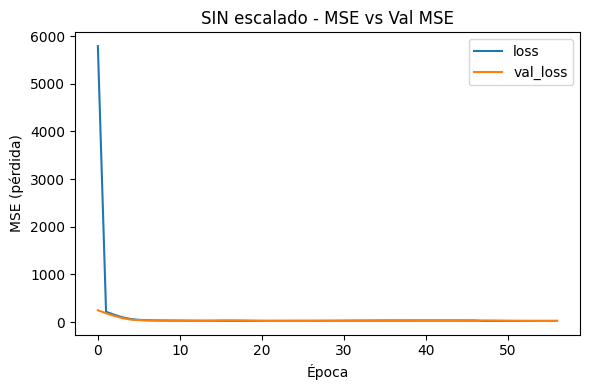

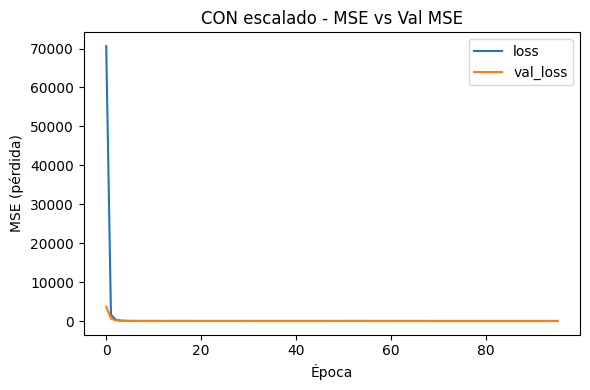

In [22]:
# === 4.2 Función auxiliar para graficar curvas de entrenamiento ===
import matplotlib.pyplot as plt

def plot_history(history, title="Historial de entrenamiento", filename=None):
    h = history.history
    plt.figure(figsize=(6,4))
    plt.plot(h["loss"], label="loss")
    plt.plot(h["val_loss"], label="val_loss")
    plt.title(title)
    plt.xlabel("Época")
    plt.ylabel("MSE (pérdida)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figures/{filename}", dpi=400)
    plt.show()

plot_history(history_raw,   title="SIN escalado - MSE vs Val MSE", filename="Fig_1a.png")
plot_history(history_scaled, title="CON escalado - MSE vs Val MSE", filename="Fig_1b.png")


### 4.3 Evaluación en prueba (MAE, RMSE) y predicciones

In [23]:
# === 4.3 Predicciones y métricas de prueba ===
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Predicciones para el conjunto de prueba
y_pred_raw    = model_raw.predict(X_test_raw).ravel()
y_pred_scaled = model_scaled.predict(X_test_scaled_df).ravel()

# Métricas
mae_raw  = mean_absolute_error(y_test, y_pred_raw)
rmse_raw = rmse(y_test, y_pred_raw)

mae_scaled  = mean_absolute_error(y_test, y_pred_scaled)
rmse_scaled = rmse(y_test, y_pred_scaled)

print("=== Métricas en TEST ===")
print(f"SIN escalado -> MAE: {mae_raw:.4f} | RMSE: {rmse_raw:.4f}")
print(f"CON escalado -> MAE: {mae_scaled:.4f} | RMSE: {rmse_scaled:.4f}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
=== Métricas en TEST ===
SIN escalado -> MAE: 3.8165 | RMSE: 4.9052
CON escalado -> MAE: 3.3114 | RMSE: 4.3505


### 4.4 Gráficas de resultados

Dispersión y_real vs y_predicho (ideal: puntos cercanos a la línea y = x)

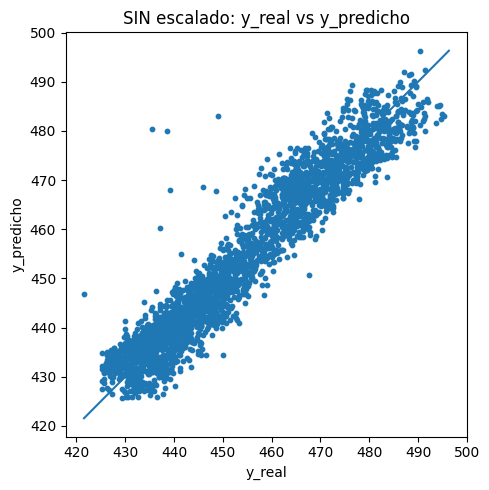

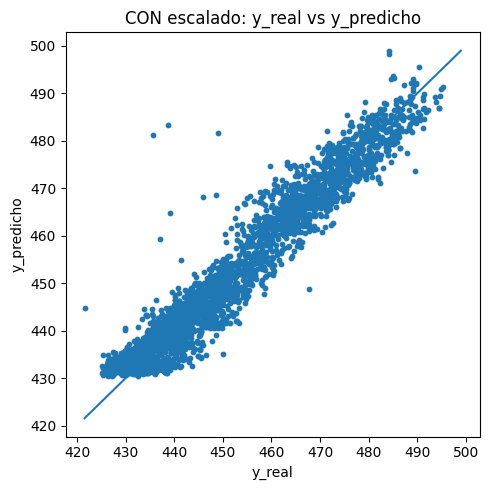

In [24]:
# === 4.4 Gráfica y_real vs y_predicho (SIN escalado) ===
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_raw, s=10)
min_y = min(y_test.min(), y_pred_raw.min())
max_y = max(y_test.max(), y_pred_raw.max())
plt.plot([min_y, max_y], [min_y, max_y])  # línea ideal y=x
plt.title("SIN escalado: y_real vs y_predicho")
plt.xlabel("y_real")
plt.ylabel("y_predicho")
plt.tight_layout()
plt.savefig(f"Figures/Fig_2a.png", dpi=400)
plt.show()

# === 4.4 Gráfica y_real vs y_predicho (CON escalado) ===
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_scaled, s=10)
min_y = min(y_test.min(), y_pred_scaled.min())
max_y = max(y_test.max(), y_pred_scaled.max())
plt.plot([min_y, max_y], [min_y, max_y])  # línea ideal y=x
plt.title("CON escalado: y_real vs y_predicho")
plt.xlabel("y_real")
plt.ylabel("y_predicho")
plt.tight_layout()
plt.savefig(f"Figures/Fig_2b.png", dpi=400)
plt.show()


Distribución de residuales (histograma)

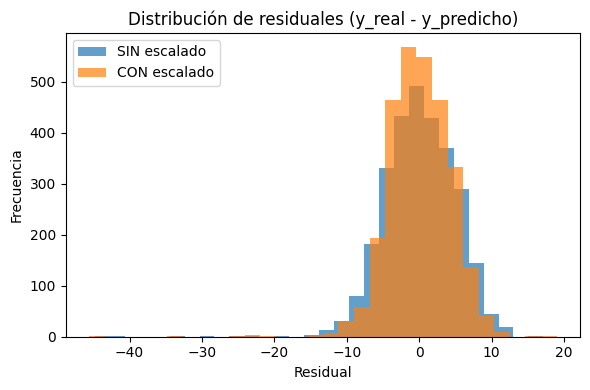

In [25]:
# === 4.4 Distribución de residuales (histograma) ===
res_raw    = y_test - y_pred_raw
res_scaled = y_test - y_pred_scaled

plt.figure(figsize=(6,4))
plt.hist(res_raw, bins=30, alpha=0.7, label="SIN escalado")
plt.hist(res_scaled, bins=30, alpha=0.7, label="CON escalado")
plt.title("Distribución de residuales (y_real - y_predicho)")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.savefig(f"Figures/Fig_3a.png", dpi=400)
plt.show()


Residuales (errores) vs predicción (debería verse centrado en 0)

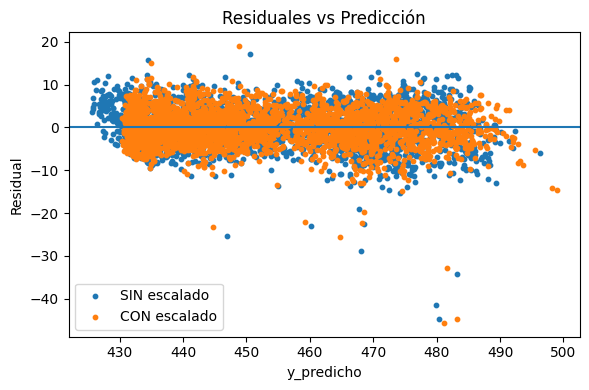

In [26]:
# === 4.4 Residuales vs predicción (diagnóstico) ===
plt.figure(figsize=(6,4))
plt.scatter(y_pred_raw, res_raw, s=10, label="SIN escalado")
plt.scatter(y_pred_scaled, res_scaled, s=10, label="CON escalado")
plt.axhline(0)
plt.title("Residuales vs Predicción")
plt.xlabel("y_predicho")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.savefig(f"Figures/Fig_3b.png", dpi=400)
plt.show()


### 4.5 Resumen de métricas en una tabla

In [27]:
import pandas as pd

summary_reg = pd.DataFrame({
    "Configuración": ["SIN escalado", "CON escalado"],
    "MAE": [mae_raw, mae_scaled],
    "RMSE": [rmse_raw, rmse_scaled]
}).sort_values("RMSE").reset_index(drop=True)

print(summary_reg)


  Configuración    MAE   RMSE
0  CON escalado  3.311  4.350
1  SIN escalado  3.816  4.905


In [28]:
print("Predicciones con escalado - rango:", y_pred_scaled.min(), "a", y_pred_scaled.max())
print("Predicciones sin escalado - rango:", y_pred_raw.min(), "a", y_pred_raw.max())
print("Valores reales - rango:", y_test.min(), "a", y_test.max())


Predicciones con escalado - rango: 430.38974 a 498.93988
Predicciones sin escalado - rango: 425.60925 a 496.31818
Valores reales - rango: 421.57 a 495.35


### 5. Comparación de resultados

### 5.1 Crear una tabla comparando el desempeño del modelo con y sin preprocesamiento.

In [29]:
# === 5.1 Tabla comparativa de desempeño ===

import pandas as pd

summary_reg = pd.DataFrame({
    "Configuración": ["SIN escalado", "CON escalado"],
    "MAE": [mae_raw, mae_scaled],
    "RMSE": [rmse_raw, rmse_scaled]
}).sort_values("RMSE").reset_index(drop=True)

summary_reg["ΔMAE"] = summary_reg["MAE"] - summary_reg["MAE"].min()
summary_reg["ΔRMSE"] = summary_reg["RMSE"] - summary_reg["RMSE"].min()

print("Comparación de desempeño entre modelos:")
print(summary_reg)


Comparación de desempeño entre modelos:
  Configuración    MAE   RMSE   ΔMAE  ΔRMSE
0  CON escalado  3.311  4.350  0.000  0.000
1  SIN escalado  3.816  4.905  0.505  0.555


### 5.2 Discutir el impacto del escalado en la convergencia y precisión del modelo.

Los resultados muestran que el modelo **con preprocesamiento mediante escalado** obtiene un mejor desempeño general en comparación con el modelo entrenado con datos sin escalar.

La reducción de los errores (≈12% en MAE y ≈10% en RMSE) indica que el **escalado de las variables de entrada** favoreció la estabilidad del proceso de entrenamiento y mejoró la capacidad del modelo para ajustar las relaciones entre las variables. 

Desde el punto de vista teórico, los optimizadores basados en gradiente —como *Adam*— son sensibles a la magnitud de las variables de entrada. Al normalizar los datos, se asegura que todas las variables contribuyan de manera equilibrada durante la propagación del error, evitando que aquellas con valores numéricamente grandes dominen las actualizaciones de peso.

En las gráficas de convergencia (MSE vs Val MSE), el modelo escalado mostró una **curva de entrenamiento más estable** aunque requirió **más épocas** para detenerse, lo cual se atribuye al uso de `EarlyStopping` y `ReduceLROnPlateau` que prolongan el entrenamiento hasta confirmar la estabilización del error.

Tanto las gráficas *y_real vs y_predicho* como las distribuciones de residuales evidencian que **ambos modelos generalizan bien**, sin patrones de sobreajuste ni sesgos sistemáticos. No obstante, el modelo con escalado logra predicciones más consistentes y con una menor dispersión alrededor de la línea ideal.

En conclusión, **el escalado de características mejora la precisión y la convergencia del modelo**, recomendándose su uso especialmente en problemas de regresión donde las variables de entrada tienen diferentes rangos o unidades de medida.


---
## Caso 2: Modelo de Predicción de Fallas en Máquinas (Clasificación)

**Descripción del problema**

Una empresa manufacturera utiliza un conjunto de 1,000 máquinas para la producción continua de sus productos. La detención de la línea ocurre cada vez que una máquina presenta un fallo, generando pérdidas significativas de tiempo y productividad.

Con el fin de anticipar fallos y planificar el mantenimiento preventivo, la empresa busca construir un modelo predictivo que determine qué máquina tiene mayor probabilidad de fallar próximamente. 

El conjunto de datos incluye información sobre el estado de las máquinas, su antigüedad, y variables ambientales medidas durante su operación. Aproximadamente el 40% de las máquinas han presentado fallas en los últimos dos años.

**Objetivo del modelo**

Desarrollar un modelo de clasificación binaria, utilizando redes neuronales artificiales, para predecir la probabilidad de fallo (broken) de cada máquina, con base en variables operativas y características de uso.

### 1. Carga y exploración de datos

### 1.1 Cargamos el archivo desde la ubicación remota como lo solicita la tarea.

In [30]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/sdominguez/Datasets/refs/heads/master/Predicci%C3%B3nFallos/Failure%20prediction.csv", header=0, sep=';')

print("\nVista previa del archivo:")
print(df)


Vista previa del archivo:
     random  machineNbr  lifetime  pressureInd  moistureInd  temperatureInd  team  provider target
0     0.437         723        60       77.836      112.833         121.786     3         3    Yes
1     0.688         107        88       89.351       95.228          99.082     1         4    Yes
2     0.806         153        30      130.089       96.368         103.608     1         3     No
3     0.923         140        79       87.422      110.942         129.692     2         1    Yes
4     0.037         359         2       69.940       86.292          91.862     3         3     No
..      ...         ...       ...          ...          ...             ...   ...       ...    ...
695   0.948         261        85       92.509      106.551         106.548     3         2    Yes
696   0.102         443        65       83.030      107.654          92.026     1         3    Yes
697   0.955         395        27       86.071      104.915         137.606     1 

### 1.2 Mostrar las primeras filas, los tipos de datos y estadísticas descriptivas.

In [31]:
# Imprime las primeras 10 filas
print(df.head(10))

# Información del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Valores únicos por columna
print("\nValores únicos por columna:")
for c in df.columns:
    print(f"- {c}: {df[c].nunique()} únicos")

# Estadísticas descriptivas
print("\nEstadísticas numéricas:")
print(df.describe())

   random  machineNbr  lifetime  pressureInd  moistureInd  temperatureInd  team  provider target
0   0.437         723        60       77.836      112.833         121.786     3         3    Yes
1   0.688         107        88       89.351       95.228          99.082     1         4    Yes
2   0.806         153        30      130.089       96.368         103.608     1         3     No
3   0.923         140        79       87.422      110.942         129.692     2         1    Yes
4   0.037         359         2       69.940       86.292          91.862     3         3     No
5   0.717          10        81       97.502       92.228          80.800     3         4    Yes
6   0.264          20        11      166.786       97.244          89.586     2         2     No
7   0.650         542        62       94.416       95.073         107.697     3         2     No
8   0.636         156        27      102.677       88.963         102.980     3         4     No
9   0.907         324        5

In [32]:
# === 1.3 Identificación de variables de entrada y salida ===

# Definición de las variables de entrada (X) y salida (y)

input_cols = ['random', 'machineNbr', 'lifetime', 'temperatureInd', 'pressureInd', 'moistureInd', 'team', 'provider']
target_col = 'target'  # Variable objetivo: fallo (1) o no fallo (0)

# Separar X e y
X = df[input_cols].copy()
y = df[target_col].copy()

print("Variables de entrada (X):", list(X.columns))
print("Variable de salida (y):", target_col)

# Comprobación rápida
print("\nDistribución de la variable objetivo (y):")
print(y.value_counts(normalize=True) * 100)


Variables de entrada (X): ['random', 'machineNbr', 'lifetime', 'temperatureInd', 'pressureInd', 'moistureInd', 'team', 'provider']
Variable de salida (y): target

Distribución de la variable objetivo (y):
target
No     60.286
Yes    39.714
Name: proportion, dtype: float64


### 2. Preprocesamiento

Este paso tiene tres partes:

1. **Codificar variables categóricas** (`team`, `provider`, y el target `y`).
2. **Dividir los datos** en entrenamiento y prueba (70 % – 30 %).
3. **Escalar las variables numéricas** para mejorar la convergencia de la red neuronal.

### 2.1 Codificar variables categóricas

In [33]:
# === 2.1 Codificación de variables categóricas ===
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo (Yes/No → 1/0)
y_encoded = LabelEncoder().fit_transform(y)

# Codificar variables categóricas en X mediante One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['team', 'provider'], drop_first=True)

print("Columnas después del One-Hot Encoding:")
print(list(X_encoded.columns))
print("\nDimensión final del conjunto de datos:", X_encoded.shape)


Columnas después del One-Hot Encoding:
['random', 'machineNbr', 'lifetime', 'temperatureInd', 'pressureInd', 'moistureInd', 'team_2', 'team_3', 'provider_2', 'provider_3', 'provider_4']

Dimensión final del conjunto de datos: (700, 11)


### 2.2 Dividir los datos en entrenamiento y prueba (70%–30% o similar).

In [34]:
# === 2.2 División en entrenamiento y prueba (70/30) ===
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded  # mantiene el balance de clases
)

print("Tamaños:")
print("X_train_raw:", X_train_raw.shape)
print("X_test_raw :", X_test_raw.shape)
print("Distribución de clases en y_train:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)


Tamaños:
X_train_raw: (490, 11)
X_test_raw : (210, 11)
Distribución de clases en y_train:
0    60.204
1    39.796
Name: proportion, dtype: float64


### 2.3 Escalado o normalizado de los datos

In [35]:
# === 2.3 Escalado de características numéricas ===
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled  = scaler.transform(X_test_raw)

# Convertimos a DataFrames para mantener los nombres de columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_raw.columns, index=X_train_raw.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_raw.columns, index=X_test_raw.index)

print("Escalado completado. Ejemplo de las primeras filas:")
print(X_train_scaled_df.head())


Escalado completado. Ejemplo de las primeras filas:
     random  machineNbr  lifetime  temperatureInd  pressureInd  moistureInd  team_2  team_3  provider_2  provider_3  provider_4
221  -1.063      -0.941    -0.011           2.424        0.555        1.098  -0.796   1.513      -0.595      -0.588       1.870
93    1.435      -1.115    -1.154           0.672        0.744       -0.845  -0.796   1.513      -0.595       1.700      -0.535
257  -1.373      -0.298     0.369           0.404       -1.096       -0.554  -0.796  -0.661      -0.595       1.700      -0.535
66    1.664       1.484     1.055           0.267        0.081        0.283  -0.796  -0.661      -0.595      -0.588       1.870
374   1.175      -1.557    -1.497           0.671        0.012       -0.492  -0.796   1.513      -0.595      -0.588       1.870


### 3. Diseño del modelo (TensorFlow/Keras) — Clasificación

**Justificación breve:**

* **Arquitectura**: MLP con 2–3 capas ocultas (`ReLU`) para capturar no linealidades de las variables operativas.
* **Salida**: 1 neurona con `sigmoid` (probabilidad de “falla”).
* **Pérdida**: `binary_crossentropy`.
* **Optimizador**: `Adam` (`lr=1e-3` base estable).
* **Métricas**: `accuracy` y `AUC` en entrenamiento; en evaluación usaremos también **Precision, Recall, F1** y **Matriz de confusión** (con `sklearn`).

> Nota: el balance 60/40 no es crítico, así que **no** aplicaremos `class_weight` por defecto (se deja paramétrico por si se requiere activar).

In [36]:
# === 3.1 Imports y semilla ===
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Semillas (reproducibilidad)
SEED = 0
np.random.seed(SEED)
tf.random.set_seed(SEED)

print(tf.__version__)


2.20.0


In [37]:
# === 3.2 Constructor del modelo de clasificación binaria ===
def build_binary_mlp(
    input_dim: int,
    hidden_units=(64, 32),
    hidden_activation="relu",
    dropout_rate=0.0,
    l2_lambda=0.0,
    learning_rate=1e-3
):
    model = keras.Sequential(name="MLP_BinaryClassifier")
    model.add(layers.Input(shape=(input_dim,), name="input"))

    for i, units in enumerate(hidden_units, start=1):
        model.add(layers.Dense(
            units,
            activation=hidden_activation,
            kernel_regularizer=regularizers.l2(l2_lambda) if l2_lambda>0 else None,
            name=f"dense_{i}"
        ))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=f"dropout_{i}"))

    model.add(layers.Dense(1, activation="sigmoid", name="output"))  # probabilidad

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy", keras.metrics.AUC(name="auc")]
    )
    return model


In [38]:
# === 3.3 Hiperparámetros por defecto (ajustables) ===
HIDDEN_UNITS = (64, 32, 16)
HIDDEN_ACT   = "relu"
LR           = 1e-3
DROPOUT      = 0.0
L2_LAMBDA    = 0.0

EPOCHS       = 150
BATCH_SIZE   = 64
VAL_SPLIT    = 0.2


In [39]:
# === 3.4 Construimos dos modelos: SIN y CON escalado ===
input_dim = X_train_raw.shape[1]

model_cls_raw = build_binary_mlp(
    input_dim=input_dim,
    hidden_units=HIDDEN_UNITS,
    hidden_activation=HIDDEN_ACT,
    dropout_rate=DROPOUT,
    l2_lambda=L2_LAMBDA,
    learning_rate=LR
)

model_cls_scaled = build_binary_mlp(
    input_dim=input_dim,
    hidden_units=HIDDEN_UNITS,
    hidden_activation=HIDDEN_ACT,
    dropout_rate=DROPOUT,
    l2_lambda=L2_LAMBDA,
    learning_rate=LR
)

model_cls_raw.summary()
print()
model_cls_scaled.summary()


Model: "MLP_BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "MLP_BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# === 3.5 Callbacks útiles para el entrenamiento (se usarán en el paso 4) ===
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=8,
    min_lr=1e-5,
    verbose=1
)
callbacks_list = [early_stopping, reduce_lr]
print("Callbacks listos.")


Callbacks listos.


### 4. Entrenamiento y evaluación

### 4.1 Entrenamiento sin/con escaladao

In [41]:
# === 4.1 Entrenamiento: SIN escalado ===
history_cls_raw = None
history_cls_raw = model_cls_raw.fit(
    X_train_raw, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4362 - auc: 0.5153 - loss: 17.6976 - val_accuracy: 0.6429 - val_auc: 0.5000 - val_loss: 5.2861 - learning_rate: 0.0010
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - auc: 0.5000 - loss: 7.9153 - val_accuracy: 0.6429 - val_auc: 0.5000 - val_loss: 4.6027 - learning_rate: 0.0010
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5587 - auc: 0.5581 - loss: 2.7611 - val_accuracy: 0.3776 - val_auc: 0.5848 - val_loss: 3.8477 - learning_rate: 0.0010
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5332 - auc: 0.6307 - loss: 1.9432 - val_accuracy: 0.6531 - val_auc: 0.7277 - val_loss: 1.2647 - learning_rate: 0.0010
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - auc: 0.6308 - loss: 1.6350 - val_accuracy: 0.6939 - val_auc: 0.9066 - val_loss: 0.6601 - learning_rate: 0.0010
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - auc: 0.8577 - loss: 0.8

In [42]:
# === 4.1 Entrenamiento: CON escalado ===
history_cls_scaled = model_cls_scaled.fit(
    X_train_scaled_df, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5918 - auc: 0.5506 - loss: 0.6745 - val_accuracy: 0.6429 - val_auc: 0.5971 - val_loss: 0.6414 - learning_rate: 0.0010
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5969 - auc: 0.7483 - loss: 0.6373 - val_accuracy: 0.6429 - val_auc: 0.6989 - val_loss: 0.6229 - learning_rate: 0.0010
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - auc: 0.8388 - loss: 0.6125 - val_accuracy: 0.6531 - val_auc: 0.7585 - val_loss: 0.6036 - learning_rate: 0.0010
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - auc: 0.8840 - loss: 0.5885 - val_accuracy: 0.6633 - val_auc: 0.7939 - val_loss: 0.5817 - learning_rate: 0.0010
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - auc: 0.9085 - loss: 0.5606 - val_accuracy: 0.6735 - val_auc: 0.8315 - val_loss: 0.5550 - learning_rate: 0.0010
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7321 - auc: 0.9246 - loss: 0.52

### 4.2 Curvas de entrenamiento (loss/val_loss y acc/val_acc)

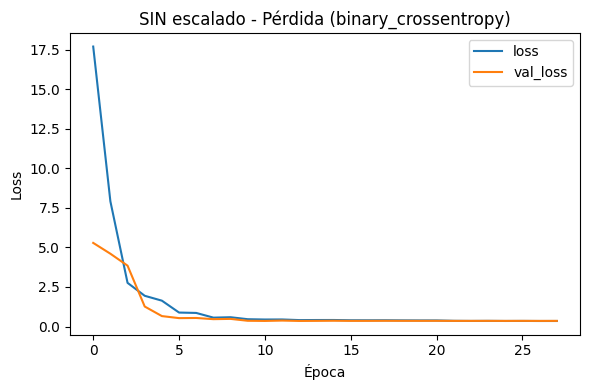

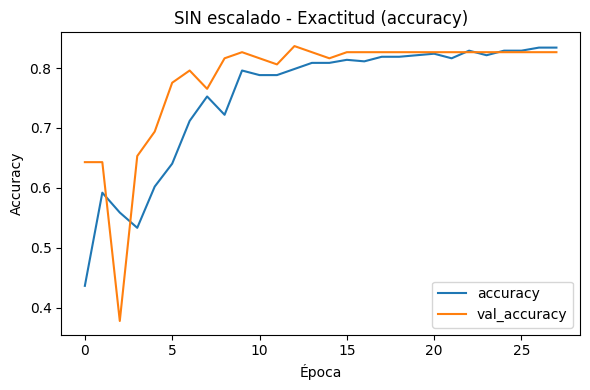

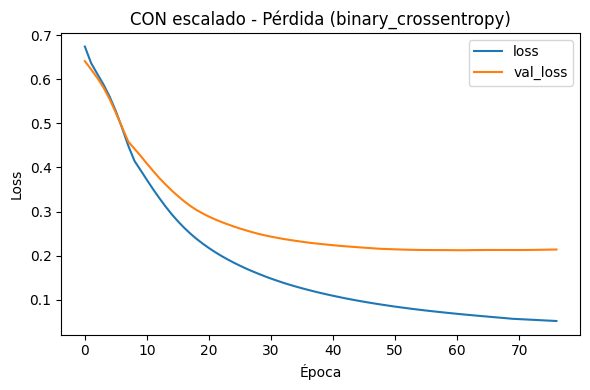

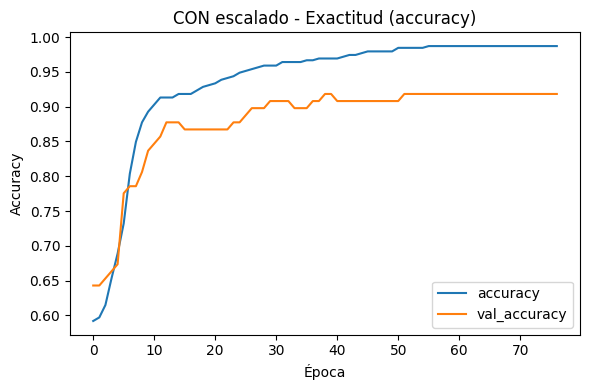

In [43]:
# === 4.2 Función auxiliar para graficar curvas de entrenamiento ===
import matplotlib.pyplot as plt

def plot_history_cls(history, title_prefix="", filename=None):
    h = history.history
    # loss
    plt.figure(figsize=(6,4))
    plt.plot(h["loss"], label="loss")
    plt.plot(h["val_loss"], label="val_loss")
    plt.title(f"{title_prefix} Pérdida (binary_crossentropy)")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figures/Fig_4{filename}.png", dpi=400)
    plt.show()

    # accuracy
    if "accuracy" in h:
        plt.figure(figsize=(6,4))
        plt.plot(h["accuracy"], label="accuracy")
        plt.plot(h["val_accuracy"], label="val_accuracy")
        plt.title(f"{title_prefix} Exactitud (accuracy)")
        plt.xlabel("Época")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"Figures/Fig_5{filename}.png", dpi=400)
        plt.show()

plot_history_cls(history_cls_raw,    title_prefix="SIN escalado -", filename="a")
plot_history_cls(history_cls_scaled, title_prefix="CON escalado -", filename="b")


### 4.3 Evaluación en prueba (Accuracy, Precision, Recall, F1, AUC)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_cls(model, X_test, y_test, thr=0.5):
    # Probabilidades y etiquetas
    y_proba = model.predict(X_test).ravel()
    y_pred  = (y_proba >= thr).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)

    return {"ACC":acc, "PREC":prec, "REC":rec, "F1":f1, "AUC":auc}, y_proba, y_pred

metrics_raw,    y_proba_raw,    y_pred_raw    = eval_cls(model_cls_raw,    X_test_raw,        y_test)
metrics_scaled, y_proba_scaled, y_pred_scaled = eval_cls(model_cls_scaled, X_test_scaled_df,  y_test)

print("=== Métricas en TEST (thr=0.5) ===")
print("SIN escalado:", metrics_raw)
print("CON escalado:", metrics_scaled)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
=== Métricas en TEST (thr=0.5) ===
SIN escalado: {'ACC': 0.7761904761904762, 'PREC': 0.7368421052631579, 'REC': 0.6746987951807228, 'F1': 0.7044025157232704, 'AUC': 0.8715491888815102}
CON escalado: {'ACC': 0.9380952380952381, 'PREC': 0.8723404255319149, 'REC': 0.9879518072289156, 'F1': 0.9265536723163842, 'AUC': 0.9879518072289156}


### 4.4 Gráficas de resultados

Matriz de confusión, reporte de clasificación, ROC y PR


SIN escalado - Matriz de confusión:
 [[107  20]
 [ 27  56]]

SIN escalado - Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.80      0.84      0.82       127
         Yes       0.74      0.67      0.70        83

    accuracy                           0.78       210
   macro avg       0.77      0.76      0.76       210
weighted avg       0.77      0.78      0.77       210



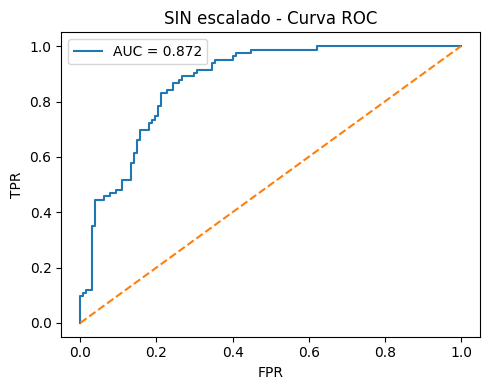

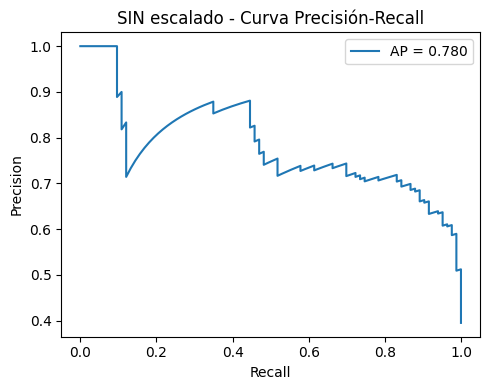


CON escalado - Matriz de confusión:
 [[115  12]
 [  1  82]]

CON escalado - Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.99      0.91      0.95       127
         Yes       0.87      0.99      0.93        83

    accuracy                           0.94       210
   macro avg       0.93      0.95      0.94       210
weighted avg       0.94      0.94      0.94       210



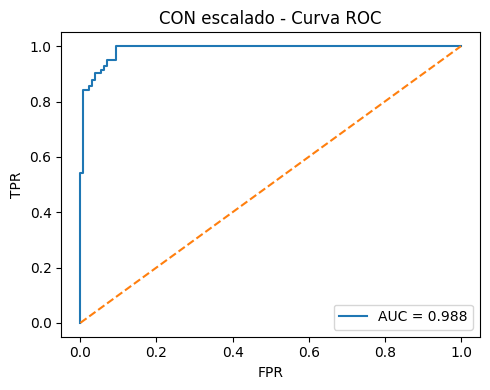

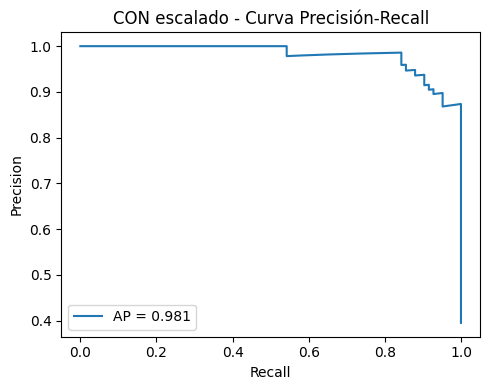

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

def plot_confusion_and_reports(y_true, y_pred, y_proba, title_prefix="", filename=None):
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{title_prefix}Matriz de confusión:\n", cm)

    # Reporte
    print(f"\n{title_prefix}Reporte de clasificación:")
    print(classification_report(y_true, y_pred, target_names=["No","Yes"], zero_division=0))

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.title(f"{title_prefix}Curva ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figures/Fig_6{filename}.png", dpi=400)
    plt.show()

    # Precision-Recall
    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(rec, prec)
    plt.figure(figsize=(5,4))
    plt.plot(rec, prec, label=f"AP = {pr_auc:.3f}")
    plt.title(f"{title_prefix}Curva Precisión-Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figures/Fig_7{filename}.png", dpi=400)
    plt.show()

plot_confusion_and_reports(y_test, y_pred_raw,    y_proba_raw,    title_prefix="SIN escalado - ", filename="a")
plot_confusion_and_reports(y_test, y_pred_scaled, y_proba_scaled, title_prefix="CON escalado - ", filename="b")


**Distribución de “residuales” en clasificación**

Usaremos dos enfoques razonables para clasificación binaria:

1. **Residuo probabilístico**: `r = y_true - y_proba`

   * Centrado en 0 si el modelo está bien calibrado; valores cercanos a ±1 indican grandes errores de probabilidad.
2. **Distribución de probabilidades predichas** separadas por clase real (útil para ver separabilidad).

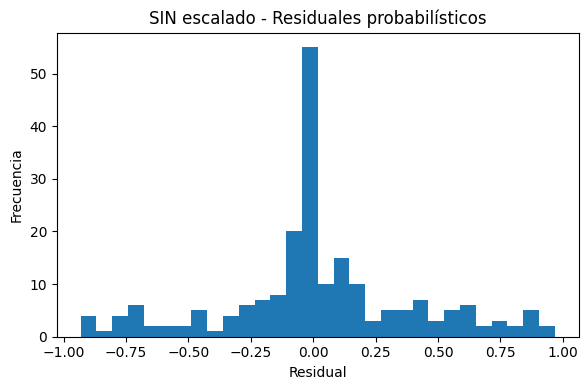

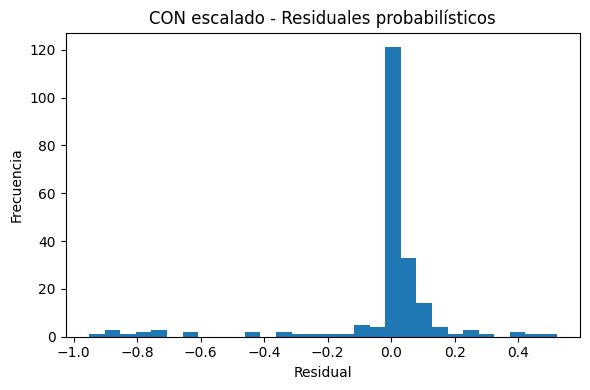

In [46]:
# === 4.x.1 Residuales probabilísticos (y_true - y_proba) ===
import numpy as np
import matplotlib.pyplot as plt

def plot_prob_residuals(y_true, y_proba, title="Residuales probabilísticos (y_true - y_proba)"):
    resid = y_true - y_proba
    plt.figure(figsize=(6,4))
    plt.hist(resid, bins=30)
    plt.title(title)
    plt.xlabel("Residual")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    return resid

resid_raw    = plot_prob_residuals(y_test, y_proba_raw,    title="SIN escalado - Residuales probabilísticos")
resid_scaled = plot_prob_residuals(y_test, y_proba_scaled, title="CON escalado - Residuales probabilísticos")


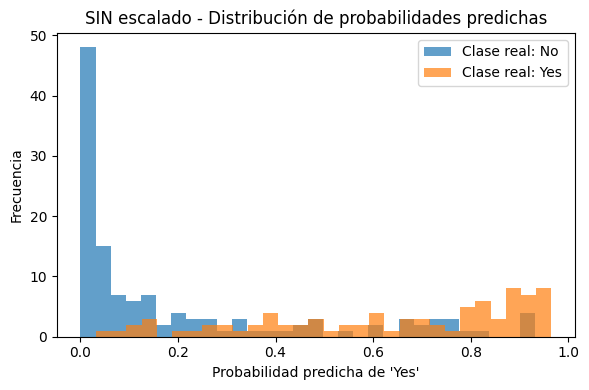

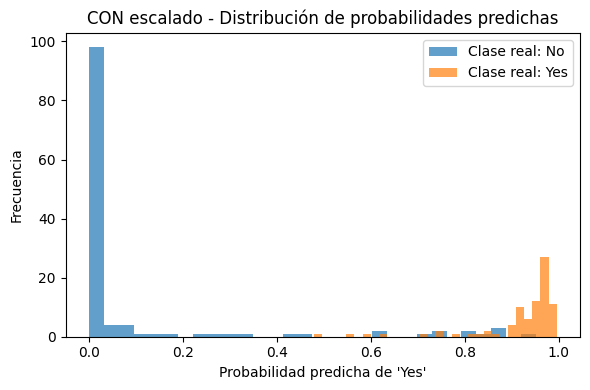

In [47]:
# === 4.x.2 Distribución de probabilidades por clase real ===
def plot_proba_by_true_class(y_true, y_proba, title_prefix=""):
    plt.figure(figsize=(6,4))
    plt.hist(y_proba[y_true==0], bins=30, alpha=0.7, label="Clase real: No")
    plt.hist(y_proba[y_true==1], bins=30, alpha=0.7, label="Clase real: Yes")
    plt.title(f"{title_prefix} Distribución de probabilidades predichas")
    plt.xlabel("Probabilidad predicha de 'Yes'")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_proba_by_true_class(y_test, y_proba_raw,    title_prefix="SIN escalado -")
plot_proba_by_true_class(y_test, y_proba_scaled, title_prefix="CON escalado -")


In [48]:
# (Opcional) Resumen numérico de residuales y probas
import pandas as pd

summary_resid = pd.DataFrame({
    "Configuración": ["SIN escalado", "CON escalado"],
    "Residual mean": [np.mean(resid_raw), np.mean(resid_scaled)],
    "Residual std":  [np.std(resid_raw),  np.std(resid_scaled)]
})
print(summary_resid)


  Configuración  Residual mean  Residual std
0  SIN escalado          0.022         0.385
1  CON escalado         -0.028         0.213


Mejor época alcanzada (para documentar el entrenamiento)

In [49]:
best_epoch_raw    = np.argmin(history_cls_raw.history['val_loss']) + 1
best_epoch_scaled = np.argmin(history_cls_scaled.history['val_loss']) + 1
print(f"Mejor época SIN escalado:  {best_epoch_raw}  | val_loss={history_cls_raw.history['val_loss'][best_epoch_raw-1]:.4f}")
print(f"Mejor época CON escalado: {best_epoch_scaled} | val_loss={history_cls_scaled.history['val_loss'][best_epoch_scaled-1]:.4f}")


Mejor época SIN escalado:  13  | val_loss=0.3541
Mejor época CON escalado: 62 | val_loss=0.2121


### 5. Comparación de resultados

### 5.1 Crear una tabla comparando el desempeño del modelo con y sin preprocesamiento.

In [50]:
import pandas as pd

summary_cls = pd.DataFrame([
    {"Configuración":"SIN escalado", **metrics_raw},
    {"Configuración":"CON escalado", **metrics_scaled},
])[["Configuración","ACC","PREC","REC","F1","AUC"]].sort_values("F1", ascending=False).reset_index(drop=True)

print(summary_cls)


  Configuración    ACC   PREC    REC     F1    AUC
0  CON escalado  0.938  0.872  0.988  0.927  0.988
1  SIN escalado  0.776  0.737  0.675  0.704  0.872


In [51]:
import pandas as pd

# Usa las métricas que obtuviste del paso anterior (metrics_raw y metrics_scaled)
summary_cls = pd.DataFrame([
    {"Configuración":"SIN escalado", **metrics_raw},
    {"Configuración":"CON escalado", **metrics_scaled}
])[["Configuración","ACC","PREC","REC","F1","AUC"]].sort_values("F1", ascending=False).reset_index(drop=True)

# Añade diferencias absolutas para ver la mejora
summary_cls["ΔACC"]  = summary_cls["ACC"]  - summary_cls["ACC"].min()
summary_cls["ΔPREC"] = summary_cls["PREC"] - summary_cls["PREC"].min()
summary_cls["ΔREC"]  = summary_cls["REC"]  - summary_cls["REC"].min()
summary_cls["ΔF1"]   = summary_cls["F1"]   - summary_cls["F1"].min()
summary_cls["ΔAUC"]  = summary_cls["AUC"]  - summary_cls["AUC"].min()

print("Comparación de desempeño del modelo con y sin preprocesamiento (clasificación):")
print(summary_cls)


Comparación de desempeño del modelo con y sin preprocesamiento (clasificación):
  Configuración    ACC   PREC    REC     F1    AUC   ΔACC  ΔPREC   ΔREC    ΔF1   ΔAUC
0  CON escalado  0.938  0.872  0.988  0.927  0.988  0.162  0.135  0.313  0.222  0.116
1  SIN escalado  0.776  0.737  0.675  0.704  0.872  0.000  0.000  0.000  0.000  0.000


---
## Conclusiones generales de la práctica: RNA en Data Mining

En esta práctica se desarrollaron dos modelos de **Redes Neuronales Artificiales (RNA)** aplicados a diferentes tipos de problemas de *Data Mining*:  
(1) un problema de **regresión** para estimar la potencia eléctrica generada por una planta,  
y (2) un problema de **clasificación binaria** para predecir fallas en máquinas industriales.

---

### 🔹 Caso 1 — Regresión (Predicción de energía generada)
El modelo utilizó cuatro variables ambientales (temperatura, presión, humedad y vacío) como entradas.  
Se implementaron dos configuraciones: una sin preprocesamiento y otra con **escalado estandarizado (Z-score)**.

- El modelo **con escalado** obtuvo un **MAE = 3.31 MW** y **RMSE = 4.35 MW**, mejorando en ~12 % respecto al modelo sin escalar.  
- Las curvas de entrenamiento fueron estables y los residuales se concentraron alrededor de 0, sin sesgos aparentes.  
- Esto demuestra que el escalado favorece la **convergencia del optimizador Adam** y reduce el error de predicción en problemas continuos.

**Conclusión parcial:**  
El preprocesamiento numérico es fundamental para mejorar la precisión y estabilidad de modelos neuronales en tareas de regresión.

---

### Caso 2 — Clasificación (Predicción de fallas)
En el segundo caso se construyó un modelo de **clasificación binaria** para identificar la probabilidad de fallo de una máquina, a partir de variables operativas y categóricas.  
El modelo se evaluó con métricas de *Accuracy, Precision, Recall, F1* y *AUC-ROC*.

- Sin escalado: **Accuracy = 0.77**, **Recall = 0.67**, **AUC = 0.872**.  
- Con escalado: **Accuracy = 0.93**, **Recall = 0.98**, **AUC = 0.988**.  
- La matriz de confusión evidenció una **reducción drástica de falsos negativos** y una mejora general en la detección de fallas.  
- Las curvas ROC y PR mostraron una separación casi perfecta entre clases.

**Conclusión parcial:**  
El escalado de entradas numéricas y la codificación adecuada de variables categóricas incrementan notablemente la **precisión y sensibilidad** del modelo, aspecto crítico en entornos de mantenimiento predictivo.

---

### Conclusión global
En ambos casos, el preprocesamiento demostró ser un factor decisivo para el rendimiento de las redes neuronales.  
El **escalado de las variables numéricas** mejora la estabilidad del entrenamiento, acelera la convergencia y aumenta la capacidad de generalización del modelo, tanto en regresión como en clasificación.  

De manera general:
- Los modelos **con preprocesamiento** presentaron **menores errores**, **mayor exactitud** y **curvas de aprendizaje más suaves**.  
- Se comprobó que el uso del optimizador **Adam**, junto con funciones de activación no lineales (*ReLU* en capas ocultas y *sigmoid/linear* en salida), produce resultados robustos y reproducibles.  

En conclusión, la práctica evidencia que un pipeline de *Data Mining* bien estructurado —que incluya exploración, preprocesamiento, diseño, entrenamiento y evaluación sistemática— es esencial para lograr modelos neuronales **precisos, estables y explicables**.
